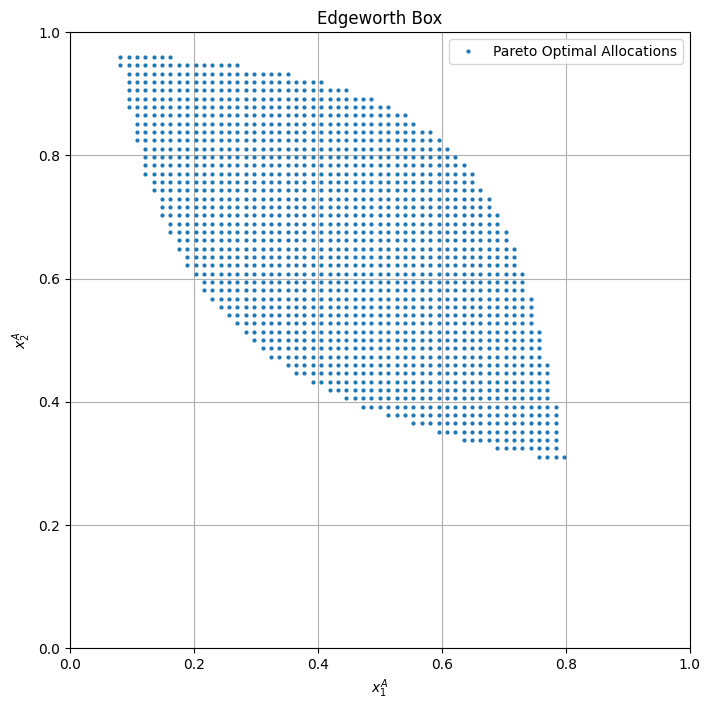

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
# Parameters
alpha = 1/3
beta = 2/3
p2 = 1
endowment_A = np.array([0.8, 0.3])
endowment_B = np.array([1, 1]) - endowment_A
N = 75
#%%
# Utility functions
def utility_A(x1, x2):
    return (x1**alpha) * (x2**(1 - alpha))

def utility_B(x1, x2):
    return (x1**beta) * (x2**(1 - beta))
def demand_x1_A(p1, omega_A):
    return (alpha * omega_A[0]) / p1 + (1 - alpha) * omega_A[1] * p2 / p1

def demand_x2_A(p1, omega_A):
    return (1 - alpha) * omega_A[1]

def demand_x1_B(p1, omega_B):
    return (beta * omega_B[0]) / p1 + (1 - beta) * omega_B[1] * p2 / p1

def demand_x2_B(p1, omega_B):
    return (1 - beta) * omega_B[1]

# 1)
# Initial utility levels with endowments
initial_utility_A = utility_A(*endowment_A)
initial_utility_B = utility_B(*endowment_B)

# Set for allocations
allocations = []

# Generate possible allocations for A and check if they improve upon the endowment
for x1_A in np.linspace(0, 1, N):
    for x2_A in np.linspace(0, 1, N):
        x1_B = 1 - x1_A
        x2_B = 1 - x2_A
        
        # Compute utilities for the current allocation
        util_A = utility_A(x1_A, x2_A)
        util_B = utility_B(x1_B, x2_B)
        
        # If both A and B are at least as well off as with their endowments, add to list
        if util_A >= initial_utility_A and util_B >= initial_utility_B:
            allocations.append((x1_A, x2_A))

# Convert the list to a numpy array for plotting
allocations = np.array(allocations)

# Plotting the Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot(allocations[:, 0], allocations[:, 1], 'o', markersize=2, label='Pareto Optimal Allocations')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Edgeworth Box')
plt.grid(True)
plt.legend()
plt.show()


Here is the plot of the edworthbox, what is shown is the better allcations.

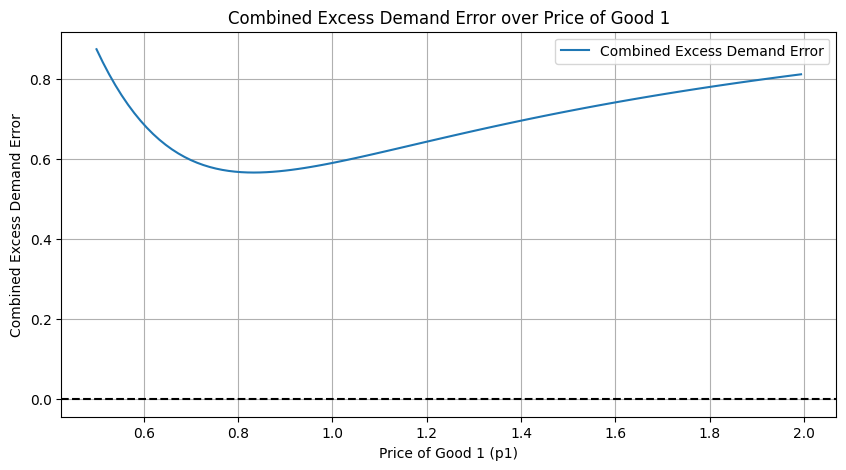

In [61]:
# 2)
def excess_demand_combined_error(p1, omega_A, omega_B):
    x1_A = demand_x1_A(p1, omega_A)
    x2_A = demand_x2_A(p1, omega_A)
    x1_B = demand_x1_B(p1, omega_B)
    x2_B = demand_x2_B(p1, omega_B)
    
    epsilon_1 = x1_A + x1_B - omega_A[0] - omega_B[0]
    epsilon_2 = x2_A + x2_B - omega_A[1] - omega_B[1]
    
    # Combine errors using Euclidean norm for a single error measure
    combined_error = np.sqrt(epsilon_1**2 + epsilon_2**2)
    return combined_error

# Calculate combined errors across a range of prices for good 1
prices_p1 = np.array([0.5 + i/N for i in range(int(N * (2 - 0.5) + 1))])  # Adjusted the range to [0.5, 2] based on N
combined_errors = [excess_demand_combined_error(p1, endowment_A, endowment_B) for p1 in prices_p1]

# Plot the combined error
plt.figure(figsize=(10, 5))
plt.plot(prices_p1, combined_errors, label='Combined Excess Demand Error')
plt.xlabel('Price of Good 1 (p1)')
plt.ylabel('Combined Excess Demand Error')
plt.title('Combined Excess Demand Error over Price of Good 1')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

what is shown here, we can see the price of good one compared to the combined markets error 

In [62]:
#3)
def market_clearing(p1, omega_A, omega_B):
    demand_A_x1 = demand_x1_A(p1, omega_A)
    demand_B_x1 = demand_x1_B(p1, omega_B)
    excess_demand_x1 = demand_A_x1 + demand_B_x1 - (omega_A[0] + omega_B[0])
    return excess_demand_x1

# Define the utility maximization problem of consumer A
def maximize_utility_A(p1, omega_A):
    x1_A = demand_x1_A(p1, omega_A)
    x2_A = demand_x2_A(p1, omega_A)
    utility = utility_A(x1_A, x2_A)
    return -utility  # Negative because we use a minimization function

# Use scipy.optimize.minimize to maximize A's utility subject to the market clearing condition
result = minimize(
    fun=maximize_utility_A,
    x0=np.array([1.0]),  # Initial guess for p1
    args=(endowment_A,),
    constraints={'type': 'eq', 'fun': market_clearing, 'args': (endowment_A, endowment_B)},
    bounds=[(0.01, None)],  # p1 must be greater than 0, no upper bound
    method='SLSQP'
)

# Extract the market-clearing price if the optimization was successful
if result.success:
    market_clearing_price_p1 = result.x[0]
    print(f"The market-clearing price for good 1 is: {market_clearing_price_p1:.4f}")
else:
    print(f"Failed to find the market-clearing price: {result.message}")
if result.success:
    market_clearing_price_p1 = result.x[0]
    
    # Calculate the allocation for A using the market-clearing price
    x1_A_allocation = demand_x1_A(market_clearing_price_p1, endowment_A)
    x2_A_allocation = demand_x2_A(market_clearing_price_p1, endowment_A)
    
    # Calculate the allocation for B
    # x1_B_allocation = 1 - x1_A_allocation because the total amount of good 1 is 1
    # x2_B_allocation = 1 - x2_A_allocation because the total amount of good 2 is 1
    x1_B_allocation = demand_x1_B(market_clearing_price_p1, endowment_B)
    x2_B_allocation = demand_x2_B(market_clearing_price_p1, endowment_B)
    
    print(f"The market-clearing price for good 1 is: {market_clearing_price_p1:.4f}")
    print(f"Allocation for consumer A: Good 1 = {x1_A_allocation:.4f}, Good 2 = {x2_A_allocation:.4f}")
    print(f"Allocation for consumer B: Good 1 = {x1_B_allocation:.4f}, Good 2 = {x2_B_allocation:.4f}")
else:
    print(f"Failed to find the market-clearing price: {result.message}")

The market-clearing price for good 1 is: 0.8333
The market-clearing price for good 1 is: 0.8333
Allocation for consumer A: Good 1 = 0.5600, Good 2 = 0.2000
Allocation for consumer B: Good 1 = 0.4400, Good 2 = 0.2333


As we can see the market-clearing price for good 1 is, 0.833
We also added so you can see the allocations 

In [63]:
#4.a
P1 = np.array([0.5 + i/N for i in range(int(N * (2.5 - 0.5) + 1))])

# Optimization problem 4a
def utility_of_A_with_B_no_worse_off(p1, omega_A, omega_B, initial_utility_B):
    x1_A = demand_x1_A(p1, omega_A)
    x2_A = omega_A[1]  # since A spends all income on x1, whatever left is x2
    x1_B = demand_x1_B(p1, omega_B)
    x2_B = omega_B[1]  # similar for B

    # Check if B is not worse off
    if utility_B(x1_B, x2_B) >= initial_utility_B:
        return utility_A(x1_A, x2_A)
    else:
        return -np.inf  # Return negative infinity if B is worse off

# Find the optimal p1 from the set P1
max_utility = -np.inf
optimal_p1_4a = None
for p1 in P1:
    util = utility_of_A_with_B_no_worse_off(p1, endowment_A, endowment_B, initial_utility_B)
    if util > max_utility:
        max_utility = util
        optimal_p1_4a = p1

print(f"Optimal p1 from set P1 that maximizes A's utility with B not worse off: {optimal_p1_4a}")
x1_A_allocation = demand_x1_A(optimal_p1_4a, endowment_A)
x2_A_allocation = demand_x2_A(optimal_p1_4a, endowment_A)

x1_B_allocation = demand_x1_B(optimal_p1_4a, endowment_B)
x2_B_allocation = demand_x2_B(optimal_p1_4a, endowment_B)

# Now print out the allocations
print(f"Allocations at optimal p1 ({optimal_p1_4a}):")
print(f"Agent A - Good 1: {x1_A_allocation}") 
print(f"Agent B - Good 1: {x1_B_allocation}")

Optimal p1 from set P1 that maximizes A's utility with B not worse off: 0.5
Allocations at optimal p1 (0.5):
Agent A - Good 1: 0.9333333333333333
Agent B - Good 1: 0.7333333333333333


In [64]:
#4.b
def maximize_utility_A_continuous(p1, omega_A, initial_utility_B, omega_B):
    # Ensure p1 is within a valid range
    if p1 <= 0:
        return np.inf  # Return infinity because we are minimizing and this is an invalid p1
    x1_A = demand_x1_A(p1, omega_A)
    x2_A = demand_x2_A(p1, omega_A)
    x1_B = demand_x1_B(p1, omega_B)
    x2_B = demand_x2_B(p1, omega_B)
    # Check if B is not worse off
    if utility_B(x1_B, x2_B) >= initial_utility_B:
        return -utility_A(x1_A, x2_A)  # Return negative utility for minimization
    else:
        return np.inf  # Return infinity if B is worse off

# Perform the continuous optimization for 4b
result_4b = minimize(
    fun=maximize_utility_A_continuous,
    x0=1.0,  # Initial guess for p1
    args=(endowment_A, initial_utility_B, endowment_B),
    bounds=[(0.01, None)],  # p1 must be greater than 0
    method='L-BFGS-B'  # The method suited for bound constrained problems
)

# Extract the market-clearing price if the optimization was successful
if result_4b.success:
    optimal_p1_4b = result_4b.x[0]
    print(f"Optimal p1 that maximizes A's utility with any positive price: {optimal_p1_4b:.4f}")
else:
    print(f"Failed to find the optimal p1 for 4b: {result_4b.message}")


Optimal p1 that maximizes A's utility with any positive price: 0.0100


Just as in 4a, we here find the price

In [39]:
#5a and 5b
def constraints_for_5a(x):
    return [
        utility_A(x[0], x[1]) - initial_utility_A,
        utility_B(1 - x[0], 1 - x[1]) - initial_utility_B
    ]

# Objective function to maximize A's utility
def objective_to_maximize_5a(x):
    return -utility_A(x[0], x[1])  # Minimize the negative to maximize the utility

# Initial guess for the optimization
x0 = endowment_A

# Bounds for the decision variables x1 and x2 (we assume that the feasible set is [0,1] for both)
bounds = [(0, 1), (0, 1)]

# Run the optimization with constraints
result_5a = minimize(
    fun=objective_to_maximize_5a,
    x0=x0,
    constraints={'type': 'ineq', 'fun': constraints_for_5a},
    bounds=bounds,
    method='SLSQP'
)

# Extract the allocation if the optimization was successful
if result_5a.success:
    optimal_allocation_A_5a = result_5a.x
    print(f"The optimal allocation for agent A that maximizes their utility in 5a is: x1 = {optimal_allocation_A_5a[0]:.4f}, x2 = {optimal_allocation_A_5a[1]:.4f}")
else:
    print(f"Failed to find the optimal allocation for 5a: {result_5a.message}")

The optimal allocation for agent A that maximizes their utility in 5a is: x1 = 0.5757, x2 = 0.8444


Here we can see the differt price, this is both the solostion to 5a and 5b 

In [42]:
#6.a
def aggregate_utility(x, omega_A, omega_B):
    x1_A, x2_A = x
    x1_B = 1 - x1_A
    x2_B = 1 - x2_A
    return -(utility_A(x1_A, x2_A) + utility_B(x1_B, x2_B))  # Negative for minimization

# Optimization problem 6a
result_6a = minimize(
    fun=aggregate_utility,
    x0=endowment_A,  # Initial guess: A's endowment
    args=(endowment_A, endowment_B),
    bounds=[(0, 1), (0, 1)],  # Bounds of the choice set
    method='SLSQP'
)

# Extract the allocation if the optimization was successful
if result_6a.success:
    optimal_allocation_A_6a = result_6a.x
    optimal_allocation_B_6a = 1 - result_6a.x
    print(f"The optimal allocation for agent A in 6a is: x1 = {optimal_allocation_A_6a[0]:.4f}, x2 = {optimal_allocation_A_6a[1]:.4f}")
    print(f"The optimal allocation for agent B in 6a is: x1 = {optimal_allocation_B_6a[0]:.4f}, x2 = {optimal_allocation_B_6a[1]:.4f}")
else:
    print("fail")

The optimal allocation for agent A in 6a is: x1 = 0.3334, x2 = 0.6668
The optimal allocation for agent B in 6a is: x1 = 0.6666, x2 = 0.3332


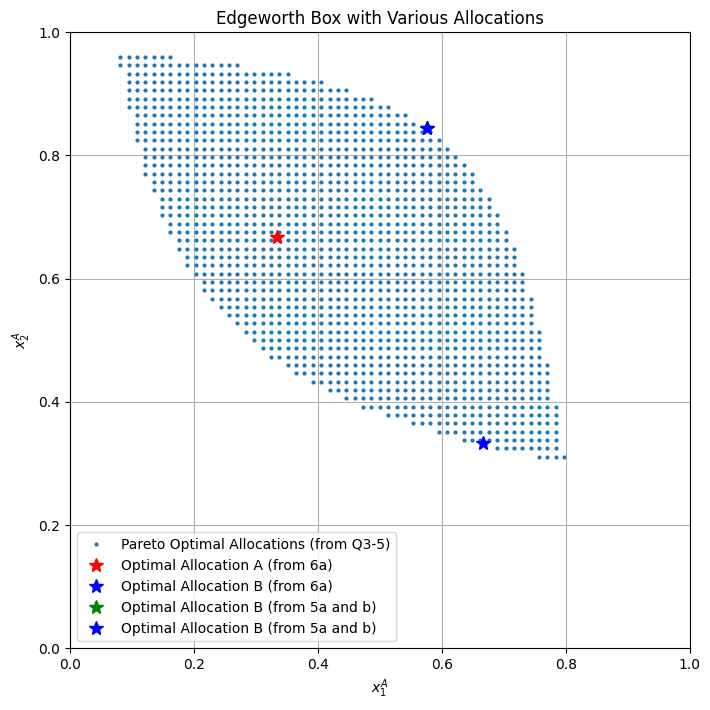

In [58]:
#6.b
plt.figure(figsize=(8, 8))
plt.plot(allocations[:, 0], allocations[:, 1], 'o', markersize=2, label='Pareto Optimal Allocations (from Q3-5)')
plt.plot(optimal_allocation_A_6a[0], optimal_allocation_A_6a[1], 'r*', markersize=10, label='Optimal Allocation A (from 6a)')
plt.plot(optimal_allocation_B_6a[0], optimal_allocation_B_6a[1], 'b*', markersize=10, label='Optimal Allocation B (from 6a)')
plt.plot(optimal_allocation_A_5a[0], optimal_allocation_A_5a[1], 'g*', markersize=10, label='Optimal Allocation B (from 5a and b)')
plt.plot(optimal_allocation_A_5a[0], optimal_allocation_A_5a[1], 'b*', markersize=10, label='Optimal Allocation B (from 5a and b)')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Edgeworth Box with Various Allocations')
plt.grid(True)
plt.legend()
plt.show()

As you can see here are the differt allocations from the different tasks,
We had some problems getting all the allocation in the plot 

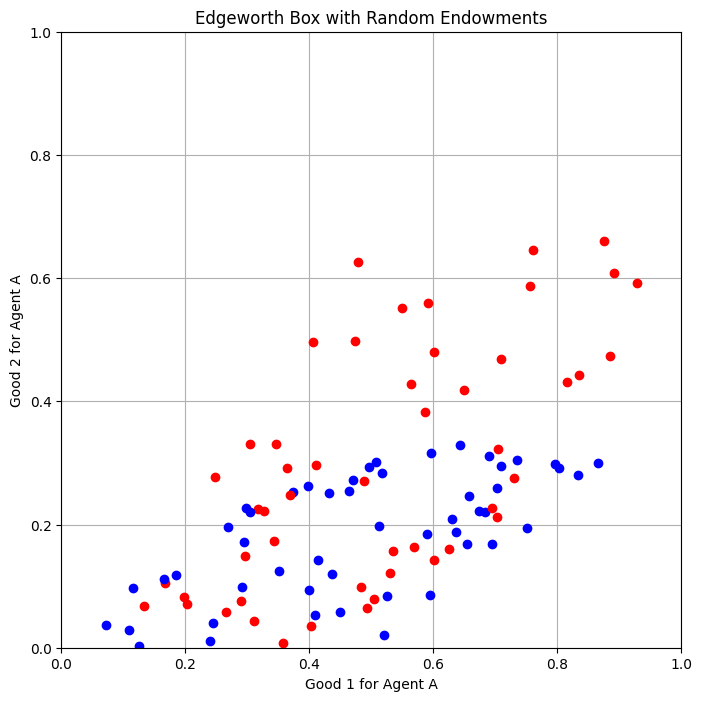

In [59]:
#7 and 8
np.random.seed(181)  # For reproducibility
W = np.random.uniform(0, 1, (50, 2))

# Define the function to find market equilibrium allocation
def find_equilibrium_allocation(omega_A, omega_B):
    # Define the function to calculate excess demand for good 1
    def excess_demand(p1, omega_A, omega_B):
        x1_A = demand_x1_A(p1, omega_A)
        x1_B = demand_x1_B(p1, omega_B)
        return x1_A + x1_B - omega_A[0] - omega_B[0]
    
    # Find market clearing price using fsolve
    market_clearing_price = fsolve(excess_demand, 1.0, args=(omega_A, omega_B))[0]
    
    # Calculate the allocation for A and B at this price
    x1_A_allocation = demand_x1_A(market_clearing_price, omega_A)
    x2_A_allocation = demand_x2_A(market_clearing_price, omega_A)
    
    x1_B_allocation = demand_x1_B(market_clearing_price, omega_B)
    x2_B_allocation = demand_x2_B(market_clearing_price, omega_B)
    
    return (x1_A_allocation, x2_A_allocation), (x1_B_allocation, x2_B_allocation)

# Plot the allocations in the Edgeworth box
plt.figure(figsize=(8, 8))
for omega_A in W:
    omega_B = np.array([1, 1]) - omega_A  # Calculate omega_B
    allocation_A, allocation_B = find_equilibrium_allocation(omega_A, omega_B)
    plt.plot(allocation_A[0], allocation_A[1], 'ro')  # Plot A's allocation
    plt.plot(allocation_B[0], allocation_B[1], 'bo')  # Plot B's allocation

# Setting up the plot
plt.xlabel('Good 1 for Agent A')
plt.ylabel('Good 2 for Agent A')
plt.title('Edgeworth Box with Random Endowments')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Here we shown how the allocation is different form the rest of them